# PreProcessing STRING for OmicsIntegrator

All Fraenkel-lab interactomes have been pre-processed to have 3 columns: 2 interactors and a scalar confidence
However, OmicsIntegrator requires that edges have a cost, not a confidence. This notebook sets costs on the edges and augments those interactomes for use in OmicsIntegrator.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
STRING_exp =  pd.read_pickle("../../interactomes/STRING/string.v10.5.cleaned.namespace-mapped.exp.pickle")
STRING_full = pd.read_pickle("../../interactomes/STRING/string.v10.5.cleaned.namespace-mapped.full.pickle")

In [3]:
STRING_exp.head()

,protein1,protein2,confidence
172927,A1BG,CRISP3,0.457
166403,A1CF,CAVIN2,0.280
17715,A2M,ADAM19,0.382
17727,A2M,ADAMTS1,0.415
17752,A2M,ADAMTS12,0.315


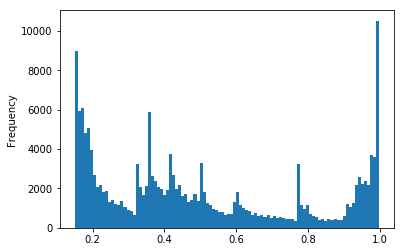

In [4]:
STRING_exp['confidence'].astype(float).plot.hist(bins=100)

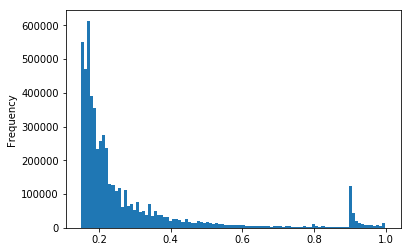

In [5]:
STRING_full['confidence'].astype(float).plot.hist(bins=100)

In [6]:
STRING_exp['cost'] = 1.5 - STRING_exp['confidence'].astype(float)
del STRING_exp['confidence']
STRING_full['cost'] = 1.5 - STRING_full['confidence'].astype(float)
del STRING_full['confidence']

STRING_exp.head()

,protein1,protein2,cost
172927,A1BG,CRISP3,1.043
166403,A1CF,CAVIN2,1.220
17715,A2M,ADAM19,1.118
17727,A2M,ADAMTS1,1.085
17752,A2M,ADAMTS12,1.185


In [8]:
STRING_exp = STRING_exp.reset_index(drop=True)
STRING_full = STRING_full.reset_index(drop=True)

STRING_exp.head()

,protein1,protein2,cost
0,A1BG,CRISP3,1.043
1,A1CF,CAVIN2,1.220
2,A2M,ADAM19,1.118
3,A2M,ADAMTS1,1.085
4,A2M,ADAMTS12,1.185


In [9]:
STRING_exp.to_pickle('string.v10.5.exp.oi-ready.pickle')
STRING_full.to_pickle('string.v10.5.full.oi-ready.pickle')